In this notebook, we convert the Sersic profile parameters to Chameleon porofile parameter through fitting. These Chameleon parmeters are used to initiate the lens model fitting from a somewhat good position instead of a completely arbitrary initialization. 

In [1]:
# some standard python imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create mock image with high S/N from the Sersic parameters, then fit it with Chameleon profiles. Three Chameleon profiles are fit to three Sersic profiles one at a time.

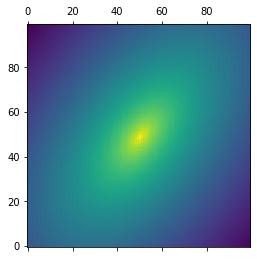

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
Converged after 165 iterations!
Best fit found:  -105116330.5633564 [0.05931353027057668, 0.5796519827045619, -0.07927713563923687, 0.29087280636467866, 0.02798287882981844, -0.04714050288570548]
-21037.992707566576 reduced X^2 of best position
-105116330.5633564 logL
9993.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'w_c': 0.05931353027057668, 'w_t': 0.5796519827045619, 'e1': -0.07927713563923687, 'e2': 0.29087280636467866, 'center_x': 0.02798287882981844, 'center_y': -0.04714050288570548}] lens light result
[] point source result
{} special param result
1258.718220949173 time used for  PSO
-21023.26611267128 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  21023.266112671285


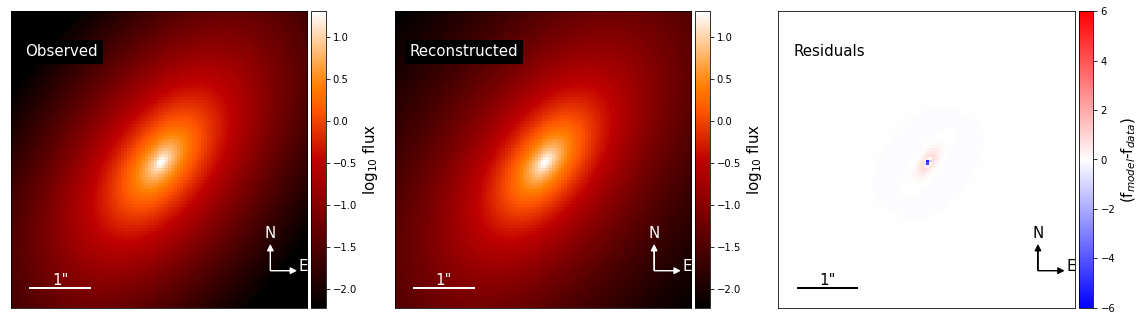

/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:523: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data - model), origin='lower', vmin=v_min, vmax=v_max,


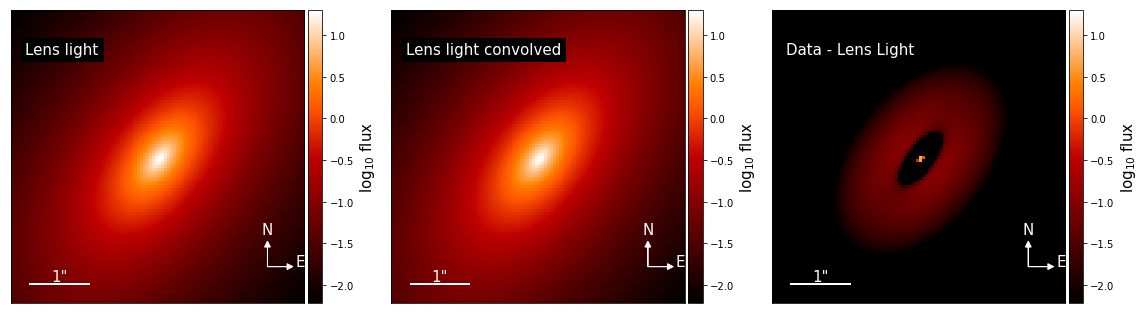

[{'amp': 673.2640988996767, 'w_c': 0.05931353027057668, 'w_t': 0.5796519827045619, 'e1': -0.07927713563923687, 'e2': 0.29087280636467866, 'center_x': 0.02798287882981844, 'center_y': -0.04714050288570548}]


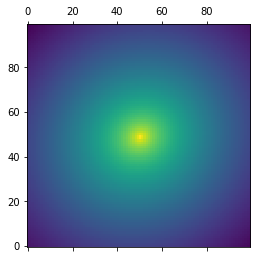

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
Converged after 161 iterations!
Best fit found:  -19234293.057708144 [0.31591678251049216, 6.2219079615305235, 0.02656806043341877, 0.04028725764835484, 0.02814514289108032, -0.04734816016482716]
-3849.5532988508244 reduced X^2 of best position
-19234293.057708144 logL
9993.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'w_c': 0.31591678251049216, 'w_t': 6.2219079615305235, 'e1': 0.02656806043341877, 'e2': 0.04028725764835484, 'center_x': 0.02814514289108032, 'center_y': -0.04734816016482716}] lens light result
[] point source result
{} special param result
1152.6772689819336 time used for  PSO
-3846.8586115416288 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  3846.8586115416288


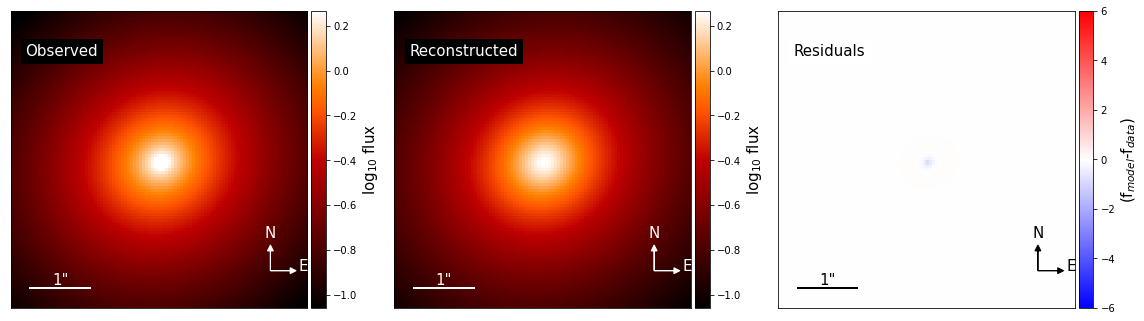

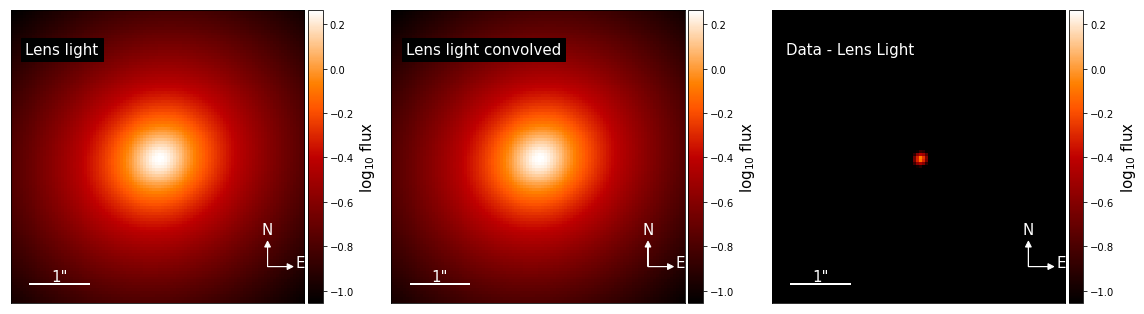

[{'amp': 613.8381471319229, 'w_c': 0.31591678251049216, 'w_t': 6.2219079615305235, 'e1': 0.02656806043341877, 'e2': 0.04028725764835484, 'center_x': 0.02814514289108032, 'center_y': -0.04734816016482716}]


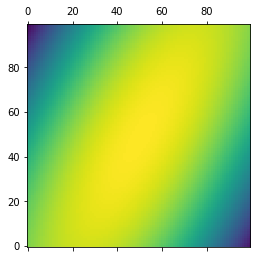

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
Max iteration reached! Stopping.
-685.1151390808913 reduced X^2 of best position
-3423177.7924176734 logL
9993.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'w_c': 2.132218646769897, 'w_t': 2.1322186467701614, 'e1': -0.2710569909854522, 'e2': 0.4564340906771116, 'center_x': 0.02873678081704855, 'center_y': -0.048953396113357875}] lens light result
[] point source result
{} special param result
1707.796540260315 time used for  PSO
-684.6355584835346 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  684.6355584835346


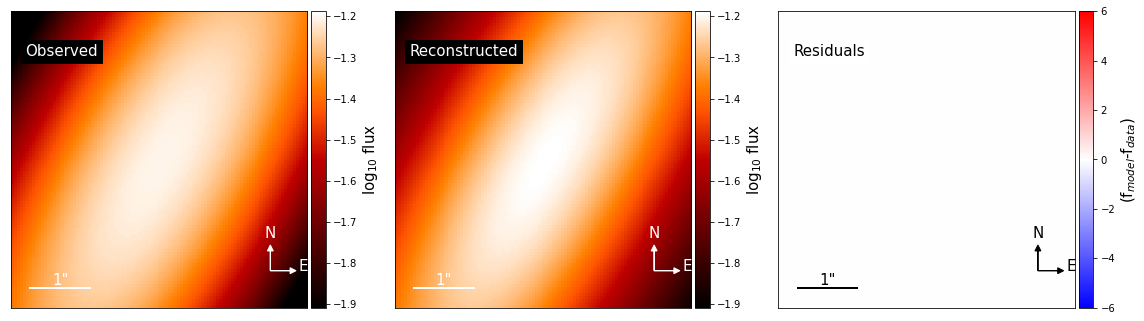

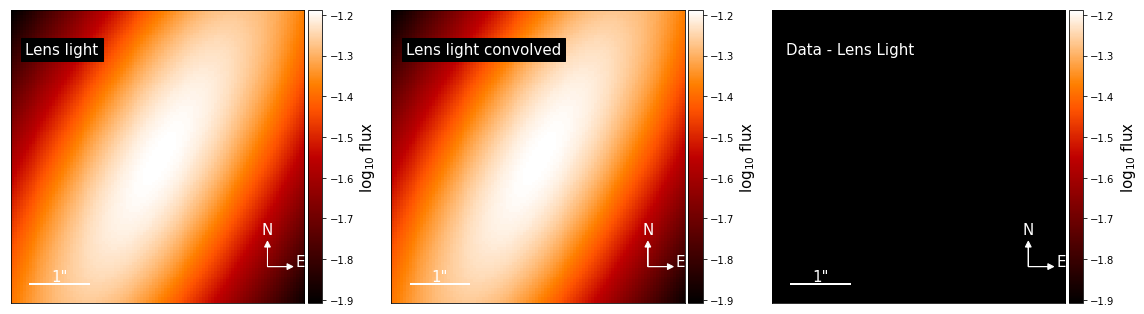

[{'amp': 33.00503003414012, 'w_c': 2.132218646769897, 'w_t': 2.1322186467701614, 'e1': -0.2710569909854522, 'e2': 0.4564340906771116, 'center_x': 0.02873678081704855, 'center_y': -0.048953396113357875}]
Done


In [2]:
import lenstronomy.Util.simulation_util as sim_util
import lenstronomy.Util.image_util as image_util
from lenstronomy.Data.imaging_data import ImageData as Data
from lenstronomy.Data.psf import PSF
import lenstronomy.Util.param_util as param_util
from lenstronomy.ImSim.image_model import ImageModel
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.LightModel.light_model import LightModel

# data specifics
background_rms = .0000001  # background noise per pixel, as we eant very high S/N
exp_time = 10000000  # exposure time (arbitrary units, flux per pixel is in units #photons/exp_time unit), as we eant very high S/N
numPix = 100  # cutout pixel size
deltaPix = 0.05  # pixel size in arcsec (area per pixel = deltaPix**2)
fwhm = 0.001 # full width half max of PSF, we use very small FWHM to fit the Chameleon profile to a unconvolved Sersic profile

kwargs_data = sim_util.data_configure_simple(numPix, deltaPix, exp_time, background_rms)
data_class = Data(**kwargs_data)

# PSF specification
kwargs_psf = {'psf_type': 'NONE', 'fwhm': fwhm, 'pixel_size': deltaPix, 'truncation': 6}
psf_class = PSF(**kwargs_psf)

# create a model with three Sersic profiles
lens_light_model_list = ['SERSIC_ELLIPSE']

lightModel = LightModel(lens_light_model_list)


## with 'UNIFORM' light profile for Sersic fitting
# lens_light_kwargs = [{'R_sersic': 1.5266033626202373,
#                       'amp': 285.20590521738984,
#                       'center_x': -0.0016150326993731418,
#                       'center_y': -0.004199386500236469,
#                       'e1': -0.05746843595528314,
#                       'e2': 0.2268020356022427,
#                       'n_sersic': 2.538451808899774},
#                      {'R_sersic': 4.957235505140421,
#                       'amp': -1.400438907247791,
#                       'center_x': -0.0016150326993731418,
#                       'center_y': -0.004199386500236469,
#                       'e1': 0.16153161415473508,
#                       'e2': -0.3745663127510888,
#                       'n_sersic': 2.0088700210598964},
#                      {'R_sersic': 3.729430082516386,
#                       'amp': 5.204216590998591,
#                       'center_x': -0.0016150326993731418,
#                       'center_y': -0.004199386500236469,
#                       'e1': -0.49163344759457084,
#                       'e2': -0.29882956772540836,
#                       'n_sersic': 1.158807565400542}
#                     ]

## without 'UNIFORM' light profile for Sersic fitting
lens_light_kwargs = [{'amp': 567.6426670845879, 'R_sersic': 0.8197067665963308, 
                      'n_sersic': 1.9689791372819925, 'e1': -0.07623528943309586, 
                      'e2': 0.2836845562553193, 'center_x': 0.028018996272468556, 
                      'center_y': -0.047125706228615165}, 
                     {'amp': 41.85059788678724, 'R_sersic': 3.382537646924453, 
                      'n_sersic': 1.9314134541126626, 'e1': 0.025781180855518716, 
                      'e2': 0.039061649629272534, 'center_x': 0.028018996272468556, 
                      'center_y': -0.047125706228615165}, 
                     {'amp': 12.785031634712599, 'R_sersic': 5.84374159325907, 
                      'n_sersic': 0.5019553048152823, 'e1': -0.26839778822797533, 
                      'e2': 0.4251632692561582, 'center_x': 0.028018996272468556, 
                      'center_y': -0.047125706228615165}] 

chameleon_kwargs = []

for light_kwargs in lens_light_kwargs:
    kwargs_light = [light_kwargs] #, kwargs_2, kwargs_3]

    kwargs_numerics = {'supersampling_factor': 5}

    imageModel = ImageModel(data_class, psf_class, lens_light_model_class=lightModel, kwargs_numerics=kwargs_numerics)
    image_sim = imageModel.image(kwargs_lens_light=kwargs_light)
    poisson = image_util.add_poisson(image_sim, exp_time=exp_time)
    bkg = image_util.add_background(image_sim, sigma_bkd=background_rms)
    image_noisy = image_sim #+ bkg + poisson


    data_class.update_data(image_noisy)
    kwargs_data['image_data'] = image_noisy

    plt.matshow(np.log10(image_noisy), origin='lower')
    plt.show()

    lens_light_model_list = ['CHAMELEON']

    kwargs_model = {'lens_light_model_list': lens_light_model_list}
    kwargs_constraints = {}
    kwargs_numerics_galfit = {'supersampling_factor': 5}
    kwargs_likelihood = {'check_bounds': True}

    image_band = [kwargs_data, kwargs_psf, kwargs_numerics_galfit]
    multi_band_list = [image_band]


    # lens light model choices
    fixed_lens_light = []
    kwargs_lens_light_init = []
    kwargs_lens_light_sigma = []
    kwargs_lower_lens_light = []
    kwargs_upper_lens_light = []

    # first Sersic component
    fixed_lens_light.append({})
    kwargs_chameleon_init = {'w_c': 0.15, 'w_t': 0.003, #'e1': 0.098, 'e2': -0.19, 
                             'e1': light_kwargs['e1'], 'e2': light_kwargs['e2'],
                             'center_x': 0, 'center_y': 0.0}
    kwargs_lens_light_init.append(kwargs_chameleon_init)
    kwargs_lens_light_sigma.append({'e1': 0.2, 'w_t': 0.2, 'w_c': .1, 'e2': 0.2,
                                   'center_y': deltaPix/10, 'center_x': deltaPix/10})
    kwargs_lower_lens_light.append({'e1': -0.8, 'e2': -0.7, 'w_t': 0.001, 'w_c': .001,
                                   'center_y': -10, 'center_x': -10})
    kwargs_upper_lens_light.append({'e1': 0.8, 'e2': 0.7, 'w_t': 10, 'w_c': 10,
                                               'center_y': 10, 'center_x': 10})

    lens_light_params = [kwargs_lens_light_init, kwargs_lens_light_sigma, fixed_lens_light, kwargs_lower_lens_light, kwargs_upper_lens_light]

    kwargs_params = {'lens_light_model': lens_light_params}


    kwargs_data_joint = {'multi_band_list': multi_band_list,
                         'multi_band_type': 'multi-linear'
                        }

    fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params)

    fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 400, 'n_iterations': 250}]]

    pso_output = fitting_seq.fit_sequence(fitting_kwargs_list)
    kwargs_result = fitting_seq.best_fit()

    lens_result = kwargs_result['kwargs_lens']
    lens_light_result = kwargs_result['kwargs_lens_light']
    source_resutlt = kwargs_result['kwargs_source']

    lens_plot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02,
                        multi_band_type='multi-linear'#, source_marg=True, linear_prior=[1e5, 1e5, 1e5]
                        )


    f, axes = plt.subplots(1, 3, figsize=(16, 8), sharex=False, sharey=False)

    lens_plot.data_plot(ax=axes[0])
    lens_plot.model_plot(ax=axes[1])
    lens_plot.absolute_residual_plot(ax=axes[2], v_min=-6, v_max=6)
    f.tight_layout()
    #f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
    plt.show()

    f, axes = plt.subplots(1, 3, figsize=(16, 8), sharex=False, sharey=False)

    lens_plot.decomposition_plot(ax=axes[0], text='Lens light', lens_light_add=True, unconvolved=True)
    lens_plot.decomposition_plot(ax=axes[1], text='Lens light convolved', lens_light_add=True)
    lens_plot.subtract_from_data_plot(ax=axes[2], text='Data - Lens Light', lens_light_add=True)
    f.tight_layout()
    
    plt.show()
    print(lens_light_result)
    chameleon_kwargs.append(lens_light_result[0])
    
print('Done')

In [3]:
chameleon_kwargs

[{'amp': 673.2640988996767,
  'w_c': 0.05931353027057668,
  'w_t': 0.5796519827045619,
  'e1': -0.07927713563923687,
  'e2': 0.29087280636467866,
  'center_x': 0.02798287882981844,
  'center_y': -0.04714050288570548},
 {'amp': 613.8381471319229,
  'w_c': 0.31591678251049216,
  'w_t': 6.2219079615305235,
  'e1': 0.02656806043341877,
  'e2': 0.04028725764835484,
  'center_x': 0.02814514289108032,
  'center_y': -0.04734816016482716},
 {'amp': 33.00503003414012,
  'w_c': 2.132218646769897,
  'w_t': 2.1322186467701614,
  'e1': -0.2710569909854522,
  'e2': 0.4564340906771116,
  'center_x': 0.02873678081704855,
  'center_y': -0.048953396113357875}]